In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
from os.path import join, split

data_path = (join(
    split(os.getcwd())[0],'data'))

In [2]:
movies = pd.read_csv(
  join(data_path, 'ml-1m', 'movies.dat'),
  sep='%',
  encoding='latin-1',
  header=None,
  names=['MovieID', 'Title', 'Genres'])

## What are the possible ratings?

In [3]:
ratings = pd.read_csv(
  join(data_path, 'ml-1m', 'ratings.dat'),
  sep='%',
  header=None,
  names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

ratings['Rating'].unique()

array([5, 3, 4, 2, 1])

## What are the movie genres?

In [4]:
all_genres_unrolled = movies['Genres'].str.split('|', expand=True)

all_genres = set().union(*(all_genres_unrolled[col].unique() for col in all_genres_unrolled.columns))
all_genres = {genre for genre in all_genres if genre}
print(len(all_genres))
all_genres

18


{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

## Some basic statistics

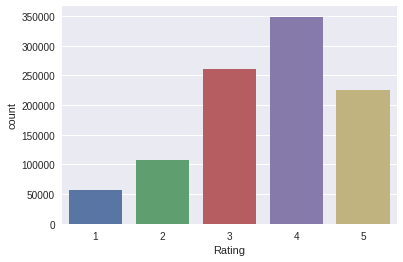

In [5]:
sns.countplot(x='Rating', data=ratings)

In [6]:
ratings_pivoted = (
  ratings
    .pivot(index='UserID', columns='MovieID', values='Rating'))

ratings_per_user = ratings_pivoted.count(axis=1)
ratings_per_movie = ratings_pivoted.count(axis=0)

## Ratings per user

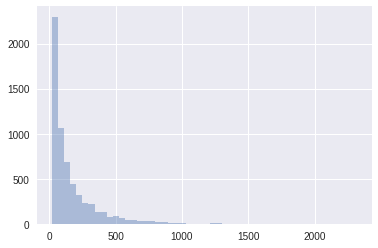

count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
dtype: float64

In [7]:
sns.distplot(
  a=ratings_per_user,
  kde=False)
plt.show()
ratings_per_user.describe()

## Ratings per movie

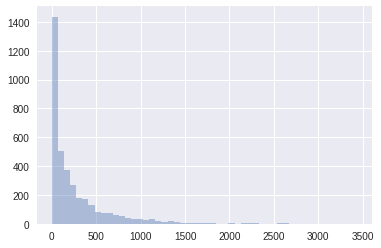

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
dtype: float64

In [8]:
sns.distplot(
  a=ratings_per_movie,
  kde=False)
plt.show()
ratings_per_movie.describe()

## Search movies by substring of title

In [9]:
contains_searched = movies['Title'].str.contains('Pulp')
movies[contains_searched]['Title']

293    Pulp Fiction (1994)
Name: Title, dtype: object